In [138]:
printmd('House Loan Data Analysis')
printmd(' ')
printmd('Data Balancing, Expolatory Data Analysis,') 
printmd('Bayesian Optimization Hyperparameter Tuning,')
printmd('Neural Network Binary Classification Model taken from Bayesian Tuners best models,\
        has 14 layers (6 Fully Connected) and 163,329 Parameters.')
printmd('Callbacks, Chekpoints, Reduce Learning Rate on Plateau,')
printmd('Classification Report, Confusion Matrix, Roc curve with Auc value,')
printmd('Precision-Recall, Threshold-Precision and Threshold-Recall curves.')
printmd('  ')
printmd('Accuracy of the Neural Network Classifier is above 96%')

## <span style="color:#cc1111">House Loan Data Analysis</span>

## <span style="color:#cc1111"> </span>

## <span style="color:#cc1111">Data Balancing, Expolatory Data Analysis,</span>

## <span style="color:#cc1111">Bayesian Optimization Hyperparameter Tuning,</span>

## <span style="color:#cc1111">Neural Network Binary Classification Model taken from Bayesian Tuners best models,        has 14 layers (6 Fully Connected) and 163,329 Parameters.</span>

## <span style="color:#cc1111">Callbacks, Chekpoints, Reduce Learning Rate on Plateau,</span>

## <span style="color:#cc1111">Classification Report, Confusion Matrix, Roc curve with Auc value,</span>

## <span style="color:#cc1111">Precision-Recall, Threshold-Precision and Threshold-Recall curves.</span>

## <span style="color:#cc1111">  </span>

## <span style="color:#cc1111">Accuracy of the Neural Network Classifier is above 96%</span>

In [1]:
##############################################################################################################
# Import the required libraries
##############################################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import tensorflow.keras
import tensorflow as tf 
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:#cc1111">'+string+'</span>'))

In [2]:
printmd('Below is the Memory saving function credit to')
printmd('https://www.kaggle.com/gemartin/load-data-reduce-memory-usage')

## <span style="color:#cc1111">Below is the Memory saving function credit to</span>

## <span style="color:#cc1111">https://www.kaggle.com/gemartin/load-data-reduce-memory-usage</span>

In [3]:
##############################################################################################################
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
##############################################################################################################

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [30]:
##############################################################################################################
# load the input house loan details csv file
##############################################################################################################
loandata = pd.read_csv('./datasets/loandata.csv')

In [31]:
##############################################################################################################
# run the memory reducing module on the read input file and observe the memory reduction
##############################################################################################################
reduce_mem_usage(loandata)

Memory usage of dataframe is 286.23 MB --> 128.16 MB (Decreased by 55.2%)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
##############################################################################################################
# check the shape of the input file to see how many rows and columns are there
##############################################################################################################
loandata.shape

(307511, 122)

In [33]:
##############################################################################################################
# run the info on the file
##############################################################################################################
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float32(65), int16(2), int32(2), int8(37), object(16)
memory usage: 128.2+ MB


In [34]:
printmd('Dataset is huge with 122 features and 300000+ rows')

## <span style="color:#cc1111">Dataset is huge with 122 features and 300000+ rows</span>

In [35]:
##############################################################################################################
# temporarily code the target column values as Default and Not Default for reporting purpose
##############################################################################################################
loandata['TARGET'] = loandata['TARGET'].apply(lambda x:'Default' if x==1 else 'Not Default')

In [36]:
##############################################################################################################
# check the percentage of Default to Not Default ratio of rows in the input file
##############################################################################################################

target=loandata['TARGET'].value_counts(normalize=True)
print('Percentage of Target Not Default:', round(target[0]*100,2), "%")
print('Percentage of Target     Default:', round(target[1]*100,2), "%")

Percentage of Target Not Default: 91.93 %
Percentage of Target     Default: 8.07 %


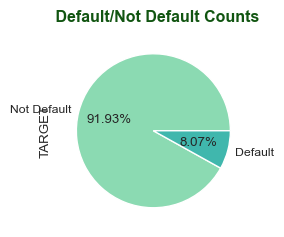

In [37]:
##############################################################################################################
# plot the default to not default counts graphically
##############################################################################################################
sns.set(style='whitegrid', palette='mako_r', font_scale=.80)
plt.figure(figsize=(6,2.5))
loandata['TARGET'].value_counts(sort=True).plot(kind='pie',autopct='%.2f%%') 
plt.suptitle('     Default/Not Default Counts',color='#115511',fontweight='bold')

plt.show()

In [38]:
printmd('Dataset is not balanced. Default rows are rare and other rows are abundant. Need to balance')

## <span style="color:#cc1111">Dataset is not balanced. Default rows are rare and other rows are abundant. Need to balance</span>

In [39]:
##############################################################################################################
# extract the rows of default and Not default into seperate variables
##############################################################################################################
loandata_Def = loandata[loandata['TARGET']=='Default']
loandata_Pay = loandata[loandata['TARGET']!='Default']

In [40]:
##############################################################################################################
# check the shpae of the variables to see how many rows are there in those variables
##############################################################################################################
loandata_Def.shape, loandata_Pay.shape

((24825, 122), (282686, 122))

In [44]:
##############################################################################################################
# check if there are any null rows in categorical variables
##############################################################################################################
cols = [col for col in loandata.columns]
for col,type in loandata.loc[:, cols].dtypes.iteritems():
    if loandata[col].isnull().sum() != 0:
        if type ==  object:
            print('col :', col.center(30),'type :', type, 'null count :', \
                  str(loandata[col].isnull().sum()).center(10) , 'nunique :', loandata[col].nunique())
            
        

col :        NAME_TYPE_SUITE         type : object null count :    1292    nunique : 7
col :        OCCUPATION_TYPE         type : object null count :   96391    nunique : 18
col :       FONDKAPREMONT_MODE       type : object null count :   210295   nunique : 4
col :         HOUSETYPE_MODE         type : object null count :   154297   nunique : 3
col :       WALLSMATERIAL_MODE       type : object null count :   156341   nunique : 7
col :      EMERGENCYSTATE_MODE       type : object null count :   145755   nunique : 2


In [45]:
printmd("5 categorical variables have nulls. Let's drop nulls from 2 variables from the abundant file")

## <span style="color:#cc1111">5 categorical variables have nulls. Let's drop nulls from 2 variables from the abundant file</span>

In [46]:
##############################################################################################################
# DRop the null rows in selected variables
##############################################################################################################
loandata_Pay.dropna(subset=['NAME_TYPE_SUITE','OCCUPATION_TYPE'], inplace=True)

In [47]:
printmd('To balance we will upsample default/rare rows, and downsample abundant/not default rows ')

## <span style="color:#cc1111">To balance we will upsample default/rare rows, and downsample abundant/not default rows </span>

In [48]:
##############################################################################################################
# As the data is imbalance we need to balance it by upsampling the rare rows and downsamplimng the abundant
##############################################################################################################
loandata_Def_samp=loandata_Def.sample(frac=2, replace=True, random_state=1)         
loandata_Pay_samp=loandata_Pay.sample(frac=0.25899, replace=True, random_state=1)   


In [49]:
##############################################################################################################
# check the shape after balancing to see if they are balanced or not
##############################################################################################################
loandata_Def_samp.shape, loandata_Pay_samp.shape

((49650, 122), (49653, 122))

In [50]:
##############################################################################################################
# concatenate the balanced files into one file
##############################################################################################################
loandata_bal = pd.concat([loandata_Def_samp,loandata_Pay_samp],axis=0)
loandata_bal.shape

(99303, 122)

In [51]:
##############################################################################################################
# load the balanced file back into the original variable and once again check the percentage of default/not D
##############################################################################################################
loandata=loandata_bal
target=loandata['TARGET'].value_counts(normalize=True)
print('Percentage of Target Not Default:', round(target[0]*100,2), "%")
print('Percentage of Target     Default:', round(target[1]*100,2), "%")

Percentage of Target Not Default: 50.0 %
Percentage of Target     Default: 50.0 %


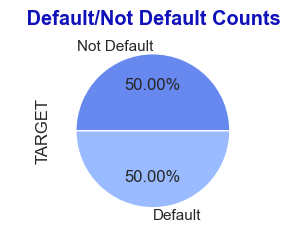

In [52]:
##############################################################################################################
# Plot the graph of Default to Not Default rows one more time
##############################################################################################################
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.0)
plt.figure(figsize=(6,2.5))
loandata['TARGET'].value_counts(sort=True).plot(kind='pie',autopct='%.2f%%')
plt.suptitle('   Default/Not Default Counts',color='#1111bb',fontweight='bold')
plt.show()

In [53]:
printmd('Looking fine after balancing ')

## <span style="color:#cc1111">Looking fine after balancing </span>

In [54]:
##############################################################################################################
# chek the null values in the categorical columns
##############################################################################################################
i = 0
cols = [col for col in loandata.columns]
for col,type in loandata.loc[:, cols].dtypes.iteritems():
    if loandata[col].isnull().sum() != 0:
        if type ==  object:
            print('col :', col.center(30),'type :', type, 'null counts :', str(loandata[col].isnull().sum()).center(10) , 'nunique :', loandata[col].nunique())
            i = i + 1
        

col :        NAME_TYPE_SUITE         type : object null counts :    136     nunique : 7
col :        OCCUPATION_TYPE         type : object null counts :   12654    nunique : 18
col :       FONDKAPREMONT_MODE       type : object null counts :   70104    nunique : 4
col :         HOUSETYPE_MODE         type : object null counts :   52878    nunique : 3
col :       WALLSMATERIAL_MODE       type : object null counts :   53459    nunique : 7
col :      EMERGENCYSTATE_MODE       type : object null counts :   50193    nunique : 2


In [55]:
##############################################################################################################
# Check the nullvalues in numeric columns
##############################################################################################################

cols = [col for col in loandata.columns]
for col,type in loandata.loc[:, cols].dtypes.iteritems():
    if loandata[col].isnull().sum() != 0:
        if type !=  object:
            print('col :', col.center(30) ,'type :', type, 'null counts :', \
                  str(loandata[col].isnull().sum()).ljust(7), 'nunique :'.center(20), loandata[col].nunique())
            i = i + 1
print(" \n")
print(" \n")
print('Total ', i , 'columns have null values out of 122 columns ')

col :          AMT_ANNUITY           type : float32 null counts : 1            nunique :       9386
col :        AMT_GOODS_PRICE         type : float32 null counts : 36           nunique :       546
col :          OWN_CAR_AGE           type : float32 null counts : 64915        nunique :       51
col :          EXT_SOURCE_1          type : float32 null counts : 55418        nunique :       28673
col :          EXT_SOURCE_2          type : float32 null counts : 201          nunique :       49662
col :          EXT_SOURCE_3          type : float32 null counts : 21072        nunique :       779
col :         APARTMENTS_AVG         type : float32 null counts : 53464        nunique :       1556
col :        BASEMENTAREA_AVG        type : float32 null counts : 60897        nunique :       2863
col :  YEARS_BEGINEXPLUATATION_AVG   type : float32 null counts : 51512        nunique :       178
col :        YEARS_BUILD_AVG         type : float32 null counts : 68464        nunique :       134
col 

In [56]:
printmd('Dataset has 65 out of 122 features with hugh number of missing values.')

## <span style="color:#cc1111">Dataset has 65 out of 122 features with hugh number of missing values.</span>

In [57]:
##############################################################################################################
# as there are too many null values in many columns we will imput them.
# numeric columns with median and categorical with mode
##############################################################################################################
from sklearn.impute import SimpleImputer

impute2 = SimpleImputer(missing_values=np.nan, strategy= 'median',verbose=1)

impute3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent',verbose=1)

In [58]:
##############################################################################################################
# collect the object/categorical columns into a variable to use in the imputing process
##############################################################################################################
objcols = loandata.select_dtypes(exclude=np.number).columns  


In [59]:
##############################################################################################################
# similarly collect the numeric columns into a variable to use in the impute process
##############################################################################################################
numcols = loandata.select_dtypes(include=np.number).columns  

In [60]:
##############################################################################################################
# load the categorical variable values into seperate variable and check the statistics before imputing
##############################################################################################################
objcolvals = loandata[objcols]
objcolvals.describe().T

,count,unique,top,freq
TARGET,99303,2,Not Default,49653
NAME_CONTRACT_TYPE,99303,2,Cash loans,90849
CODE_GENDER,99303,2,F,58972
FLAG_OWN_CAR,99303,2,N,64915
FLAG_OWN_REALTY,99303,2,Y,68043
NAME_TYPE_SUITE,99167,7,Unaccompanied,81004
NAME_INCOME_TYPE,99303,8,Working,61379
NAME_EDUCATION_TYPE,99303,5,Secondary / secondary special,73133
NAME_FAMILY_STATUS,99303,5,Married,62336
NAME_HOUSING_TYPE,99303,6,House / apartment,86115


In [61]:
##############################################################################################################
# impute the categorical varibales using most frequent/mode strategy stratgegy 
##############################################################################################################
for col in objcols:
    
    if loandata[col].isnull().sum() != 0:
        
        loandata[[col]] = loandata[[col]].ffill()

In [62]:
##############################################################################################################
# impute the categorical varibales using most frequent/mode strategy stratgegy 
##############################################################################################################
for col in objcols:
    
    if loandata[col].isnull().sum() != 0:
        
        loandata[[col]] = loandata[[col]].bfill()

In [63]:
##############################################################################################################
# check if there are any motr null rows in categorical variables
##############################################################################################################
cols = [col for col in loandata.columns]
for col,type in loandata.loc[:, cols].dtypes.iteritems():
    if loandata[col].isnull().sum() != 0:
        if type ==  object:
            print('col :', col.center(30),'type :', type, 'null count :', str(loandata[col].isnull().sum()).center(10) , 'nunique :', loandata[col].nunique())
            
        

In [64]:
##############################################################################################################
# after imputing check the statistics again to see if they are all imputed or not
##############################################################################################################
objcolvals = loandata[objcols]
objcolvals.describe().T

,count,unique,top,freq
TARGET,99303,2,Not Default,49653
NAME_CONTRACT_TYPE,99303,2,Cash loans,90849
CODE_GENDER,99303,2,F,58972
FLAG_OWN_CAR,99303,2,N,64915
FLAG_OWN_REALTY,99303,2,Y,68043
NAME_TYPE_SUITE,99303,7,Unaccompanied,81119
NAME_INCOME_TYPE,99303,8,Working,61379
NAME_EDUCATION_TYPE,99303,5,Secondary / secondary special,73133
NAME_FAMILY_STATUS,99303,5,Married,62336
NAME_HOUSING_TYPE,99303,6,House / apartment,86115


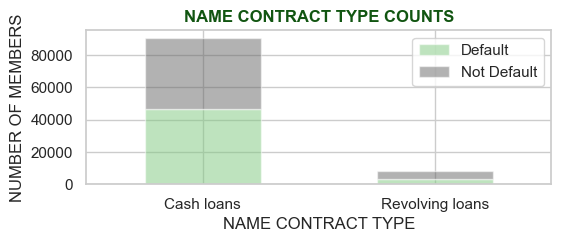

In [65]:
##############################################################################################################
# Exploratory data analysis - NAME_CONTRACT_TYPE' by 'TARGET'
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['NAME_CONTRACT_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2),stacked=True,colormap='Accent',alpha=.5)
plt.title('NAME CONTRACT TYPE COUNTS',color='#115511',fontweight='bold')
plt.xlabel('NAME CONTRACT TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

In [66]:
printmd('Cash loans are more compared to Revolving loans. Deafult/Not default is more or less same in both  ')

## <span style="color:#cc1111">Cash loans are more compared to Revolving loans. Deafult/Not default is more or less same in both  </span>

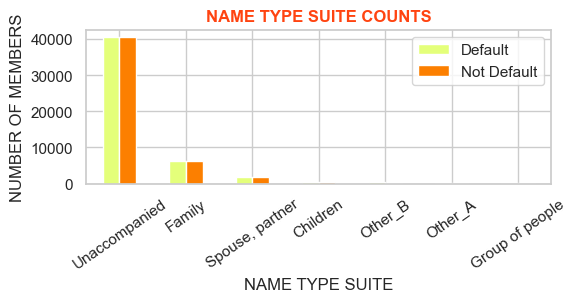

In [67]:
##############################################################################################################
# Exploratory data analysis - 'NAME_TYPE_SUITE' by 'TARGET'
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['NAME_TYPE_SUITE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2),colormap='Wistia')
plt.title('NAME TYPE SUITE COUNTS',color='#ff4411',fontweight='bold')
plt.xlabel('NAME TYPE SUITE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.xticks(rotation=35)
plt.legend(loc='best')
plt.show()

In [68]:
printmd('Unaccompanied borrowers are more compared to others. Deafult/Not default is more or less same in all categories')

## <span style="color:#cc1111">Unaccompanied borrowers are more compared to others. Deafult/Not default is more or less same in all categories</span>

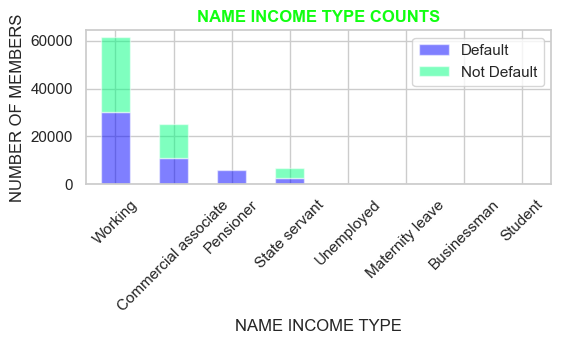

In [69]:
##############################################################################################################
# # Exploratory data analysis - 'NAME_INCOME_TYPE' by 'TARGET'
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['NAME_INCOME_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2),stacked=True,colormap='winter',alpha=.5)
plt.title('NAME INCOME TYPE COUNTS',color='#11ff11',fontweight='bold')
plt.xlabel('NAME INCOME TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [70]:
printmd('Working, Commercial associates, Pensioners and Sate servants borrowed more compared to others.\
         Deafult/Not default is more or less same in all categories except Pensioners who are most default')

## <span style="color:#cc1111">Working, Commercial associates, Pensioners and Sate servants borrowed more compared to others.         Deafult/Not default is more or less same in all categories except Pensioners who are most default</span>

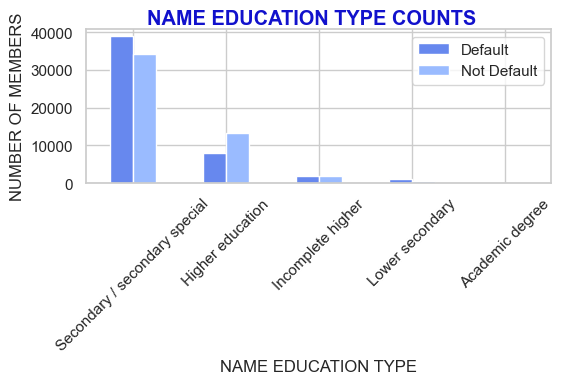

In [71]:
##############################################################################################################
# # Exploratory data analysis - 'NAME_EDUCATION_TYPE' by 'TARGET' 
##############################################################################################################
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.0)
loandata_tmp = loandata.groupby(['NAME_EDUCATION_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2))
plt.suptitle('NAME EDUCATION TYPE COUNTS',color='#1111cc',fontweight='bold')
plt.xlabel('NAME EDUCATION TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [72]:
printmd('Secondary school borrowers and defaulters are more compared to others. \
         Academic degree students are rare in borrowing')

## <span style="color:#cc1111">Secondary school borrowers and defaulters are more compared to others.          Academic degree students are rare in borrowing</span>

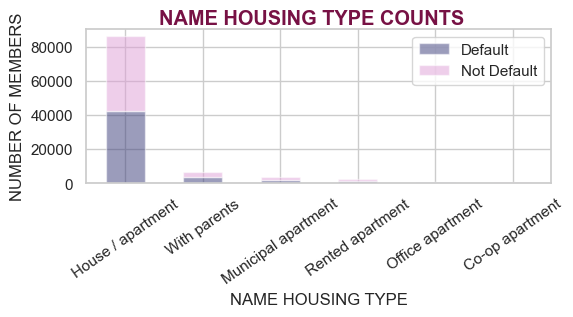

In [73]:
##############################################################################################################
# # Exploratory data analysis - 'NAME_HOUSING_TYPE' by 'TARGET' 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['NAME_HOUSING_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2),\
                                                                stacked=True,colormap='tab20b',alpha=.5)
plt.suptitle('NAME HOUSING TYPE COUNTS',color='#771144',fontweight='bold')
plt.xlabel('NAME HOUSING TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.legend(loc='best')
plt.xticks(rotation=35)
plt.show()

In [74]:
printmd('House/Apartment owners borrowed more compared to others. Deafult/Not default is more or less same in all categories')

## <span style="color:#cc1111">House/Apartment owners borrowed more compared to others. Deafult/Not default is more or less same in all categories</span>

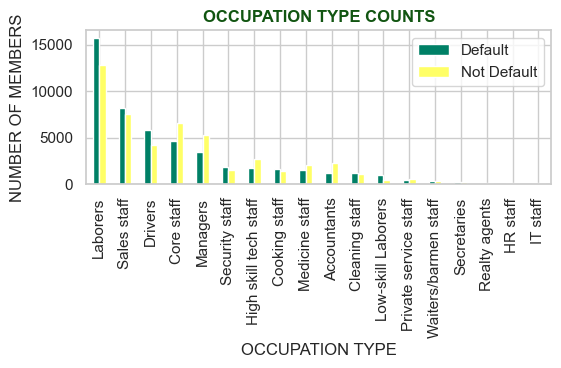

In [75]:
##############################################################################################################
# # Exploratory data analysis - 'OCCUPATION_TYPE' by 'TARGET'  
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['OCCUPATION_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(6,2),colormap='summer')
plt.title('OCCUPATION TYPE COUNTS',color='#115511',fontweight='bold')
plt.xlabel('OCCUPATION TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.legend(loc='best')
plt.show()

In [76]:
printmd('Labourers borrowerd and defaulted more compared to others. \
            Deafult/Not default is more or less same in other categories \
            IT staff are least numbers in borrowing')

## <span style="color:#cc1111">Labourers borrowerd and defaulted more compared to others.             Deafult/Not default is more or less same in other categories             IT staff are least numbers in borrowing</span>

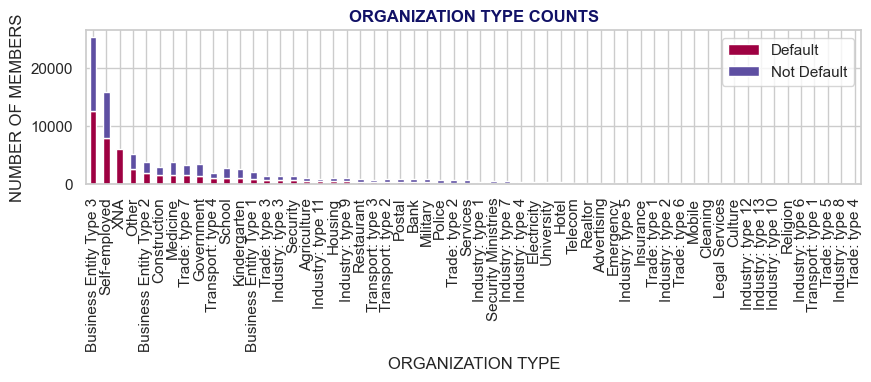

In [77]:
##############################################################################################################
# # Exploratory data analysis - 'ORGANIZATION_TYPE' by 'TARGET'   
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
loandata_tmp = loandata.groupby(['ORGANIZATION_TYPE','TARGET']).size().unstack().fillna(0)
loandata_tmp.sort_values(by='Default',ascending=False).plot.bar(figsize=(10,2),stacked=True,colormap='Spectral')
plt.title('ORGANIZATION TYPE COUNTS',color='#111166',fontweight='bold')
plt.xlabel('ORGANIZATION TYPE')
plt.ylabel('NUMBER OF MEMBERS' )
plt.legend(loc='best')
plt.show()

In [78]:
printmd('Business Entity Type 3 borrowers and defaulters are more compared to others. \
         Deafult/Not default is more or less same in all categories \
         There are many organization types who are very few in numbers.')

## <span style="color:#cc1111">Business Entity Type 3 borrowers and defaulters are more compared to others.          Deafult/Not default is more or less same in all categories          There are many organization types who are very few in numbers.</span>

In [79]:
##############################################################################################################
# # revert the values in target variable back to 0 and 1  
##############################################################################################################
loandata['TARGET'] = loandata['TARGET'].apply(lambda x:1 if x=='Default' else 0)

In [80]:
##############################################################################################################
# # Finally one more time check the counts in 'TARGET' variable to see if they are balanced   
##############################################################################################################
loandata['TARGET'].value_counts()

0    49653
1    49650
Name: TARGET, dtype: int64

In [81]:
##############################################################################################################
# encode the cateogorical variable values to numeric values for Machine learning/Training purpose
##############################################################################################################
for col in objcols:
    if col != 'TARGET':
        loandata[col] = loandata[col].factorize(sort=True)[0]
        

In [82]:
##############################################################################################################
# cehck the values in the categorical variables after encoding
##############################################################################################################
objcolvals = loandata[objcols]
objcolvals.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,99303.0,0.499985,0.500003,0.0,0.0,0.0,1.0,1.0
NAME_CONTRACT_TYPE,99303.0,0.085133,0.279081,0.0,0.0,0.0,0.0,1.0
CODE_GENDER,99303.0,0.406141,0.491114,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,99303.0,0.346294,0.475791,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,99303.0,0.685206,0.464436,0.0,0.0,1.0,1.0,1.0
NAME_TYPE_SUITE,99303.0,5.249348,1.743712,0.0,6.0,6.0,6.0,6.0
NAME_INCOME_TYPE,99303.0,5.036645,2.611887,0.0,1.0,7.0,7.0,7.0
NAME_EDUCATION_TYPE,99303.0,3.272963,1.246344,0.0,3.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,99303.0,1.385729,0.993053,0.0,1.0,1.0,2.0,4.0
NAME_HOUSING_TYPE,99303.0,1.364410,1.066754,0.0,1.0,1.0,1.0,5.0


In [83]:
##############################################################################################################
# extract the numeric variable names for imputing
##############################################################################################################
numcolvals = loandata[numcols]
numcolvals.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,99303.0,278346.561030,102562.829251,100002.0,190141.0,278581.0,366875.0,456253.0
CNT_CHILDREN,99303.0,0.481496,0.762348,0.0,0.0,0.0,1.0,11.0
AMT_INCOME_TOTAL,99303.0,169783.093750,382786.656250,25650.0,112500.0,153000.0,202500.0,117000000.0
AMT_CREDIT,99303.0,586988.562500,380665.500000,45000.0,283585.5,512064.0,785398.5,4050000.0
AMT_ANNUITY,99302.0,27223.644531,13768.799805,2317.5,17167.5,25537.5,34587.0,225000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,84288.0,0.007000,0.105630,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,84288.0,0.033219,0.199195,0.0,0.0,0.0,0.0,7.0
AMT_REQ_CREDIT_BUREAU_MON,84288.0,0.257913,0.874377,0.0,0.0,0.0,0.0,19.0
AMT_REQ_CREDIT_BUREAU_QRT,84288.0,0.257356,0.623163,0.0,0.0,0.0,0.0,19.0


In [84]:
##############################################################################################################
# Impute the numeric variables with ffill values as many of they have descrete values
##############################################################################################################
for col in numcols:
    if loandata[col].isna().sum() != 0:
        loandata[[col]] = loandata[[col]].ffill()

In [85]:
##############################################################################################################
# Impute the numeric variables with bfillmedian values as many of they have descrete values
##############################################################################################################
for col in numcols:
    if loandata[col].isna().sum() != 0:
        loandata[[col]] = loandata[[col]].bfill()

In [86]:
##############################################################################################################
# after imputing check if there are any more null values in numeric variable columns
##############################################################################################################
for col in numcols:
    if loandata[col].isnull().sum() !=0 :
        print(col,' : ', loandata[col].isnull().sum() )
    

In [87]:
##############################################################################################################
# check the statistics of the numeric varaible columns to see if everything is fine
##############################################################################################################
numcolvals = loandata[numcols]
numcolvals.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,99303.0,278346.561030,102562.829251,100002.0,190141.0,278581.0,366875.0,456253.0
CNT_CHILDREN,99303.0,0.481496,0.762348,0.0,0.0,0.0,1.0,11.0
AMT_INCOME_TOTAL,99303.0,169783.093750,382786.656250,25650.0,112500.0,153000.0,202500.0,117000000.0
AMT_CREDIT,99303.0,586988.562500,380665.500000,45000.0,283585.5,512064.0,785398.5,4050000.0
AMT_ANNUITY,99303.0,27223.859375,13768.854492,2317.5,17167.5,25537.5,34587.0,225000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,99303.0,0.006928,0.103889,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,99303.0,0.032799,0.197175,0.0,0.0,0.0,0.0,7.0
AMT_REQ_CREDIT_BUREAU_MON,99303.0,0.257485,0.867711,0.0,0.0,0.0,0.0,19.0
AMT_REQ_CREDIT_BUREAU_QRT,99303.0,0.257978,0.622806,0.0,0.0,0.0,0.0,19.0


In [88]:
##############################################################################################################
# check if the index is proper or not. if not reindex they
##############################################################################################################
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99303 entries, 2983 to 36056
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float32(65), int16(2), int32(2), int64(17), int8(36)
memory usage: 42.8 MB


In [89]:
##############################################################################################################
# as seen above the rows are not indexed properly. let us reindex and check
##############################################################################################################
loandata = loandata.reindex(method='ffill')
loandata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2983,103486,1,0,0,0,1,1,166500.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
148977,272726,1,0,0,0,0,1,175500.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
64468,174760,1,0,1,0,1,0,225000.0,601470.0,32629.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
212924,346740,1,0,0,0,1,0,121500.0,781920.0,25969.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
134732,256271,1,0,0,0,1,0,99000.0,808650.0,26217.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
##############################################################################################################
# delete the temporary variables and garbage collect
##############################################################################################################
import gc
del numcolvals, numcols, objcolvals, objcols, target
gc.collect()

47440

In [91]:
##############################################################################################################
# drop if there are any zero variance columns
##############################################################################################################
constant_column = [col for col in loandata.columns if loandata[col].nunique() == 1]
print('drop columns:', constant_column)
loandata.drop(constant_column, axis=1, inplace=True)

drop columns: ['FLAG_MOBIL', 'FLAG_DOCUMENT_12']


In [92]:
##############################################################################################################
# extract the target and feature variable data into 2 sepearte varibales for model training and evaluating
##############################################################################################################
X= loandata.iloc[:,2:]
y= loandata.iloc[:,1]

In [93]:
##############################################################################################################
# check the shapes of the newly created variables with target and feature data
##############################################################################################################
X.shape,y.shape

((99303, 118), (99303,))

In [94]:
##############################################################################################################
# check the first 5 rows of the features column
##############################################################################################################
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2983,0,0,0,1,1,166500.0,900000.0,26446.5,900000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
148977,0,0,0,0,1,175500.0,545040.0,26640.0,450000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
64468,0,1,0,1,0,225000.0,601470.0,32629.5,450000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
212924,0,0,0,1,0,121500.0,781920.0,25969.5,675000.0,4,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
134732,0,0,0,1,0,99000.0,808650.0,26217.0,675000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
##############################################################################################################
# check the first 5 rows of the target variable
##############################################################################################################
y.head()

2983      1
148977    1
64468     1
212924    1
134732    1
Name: TARGET, dtype: int64

In [96]:
##############################################################################################################
# import the required library to split the data into training and testing varaiables
##############################################################################################################
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,stratify=y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((74477, 118), (24826, 118), (74477,), (24826,))

In [97]:
ytest.value_counts()

1    12413
0    12413
Name: TARGET, dtype: int64

In [98]:
##############################################################################################################
# delete the temporaray variables and garbage collect
##############################################################################################################
del X,y
gc.collect()

140

In [99]:
##############################################################################################################
# import the libraries for deep learning model building
##############################################################################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers 
from tensorflow.keras import layers
from kerastuner import RandomSearch, BayesianOptimization

In [100]:
##############################################################################################################
# build the function for deep learning model building using Bayesian optimization
##############################################################################################################
def build_model(hp):
    num_layers = hp.Int('num_layers', 3, 5, default=3)
    opt = hp.Choice('optimizer', ['Adam'],ordered=False)  
    lr  = hp.Choice('learning_rate',[2e-5,2e-6])
    l1  = .0000001 # .0000001
    
    
    inputs = layers.Input(shape=(118,))

    x = inputs

    for idx in range(num_layers):
        idx = str(idx)

        filters = hp.Int('filters_' + idx, 64, 256, step=64, default=64)
        x = layers.Dense(units=filters, kernel_regularizer=tf.keras.regularizers.l2(l1),
                          activation=tf.nn.relu)(x)
        x = layers.BatchNormalization()(x)
        
    
    
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.l1(l1))(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(1, activation=tf.nn.sigmoid)(x)

    # Build model
    model = tensorflow.keras.Model(inputs, outputs)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [101]:
##############################################################################################################
# # number of models to train using Bayesian optimization; each trails takes 5+ minutes
##############################################################################################################
TRIALS = 8   


In [102]:
##############################################################################################################
# Build the models with choices mentioned in the build model function using Bayesian algorithm
##############################################################################################################
tuner = BayesianOptimization(build_model, objective='val_accuracy', max_trials=TRIALS,
                     project_name='./datasets/House_loan_results101') 

INFO:tensorflow:Reloading Oracle from existing project .\./datasets/House_loan_results101\oracle.json
INFO:tensorflow:Reloading Tuner from .\./datasets/House_loan_results101\tuner0.json


In [103]:
##############################################################################################################
# display the search space summary with choices
##############################################################################################################
tuner.search_space_summary()

Search space summary
Default search space size: 8
num_layers (Int)
{'default': 3, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam'], 'ordered': False}
learning_rate (Choice)
{'default': 2e-05, 'conditions': [], 'values': [2e-05, 2e-06], 'ordered': True}
filters_0 (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
filters_1 (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
filters_2 (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
filters_3 (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}
filters_4 (Int)
{'default': 64, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': None}


In [104]:
##############################################################################################################
# start searing/building models
##############################################################################################################
history = tuner.search(xtrain, ytrain, validation_data=(xtest, ytest), epochs=8, 
                      batch_size=200,verbose=1)   #,callbacks=[tqdm_callback])

INFO:tensorflow:Oracle triggered exit


In [105]:
##############################################################################################################
# display the top 5 models in the decreasing efficiency
##############################################################################################################
tuner.results_summary(num_trials=2)

Results summary
Results in .\./datasets/House_loan_results101
Showing 2 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
optimizer: Adam
learning_rate: 2e-05
filters_0: 128
filters_1: 128
filters_2: 256
filters_3: 192
filters_4: 64
Score: 0.6367517709732056
Trial summary
Hyperparameters:
num_layers: 4
optimizer: Adam
learning_rate: 2e-05
filters_0: 128
filters_1: 128
filters_2: 128
filters_3: 64
Score: 0.6349794864654541


In [106]:
##############################################################################################################
# load the first best model for evaluating our data. Display the model summary as well.
##############################################################################################################
import warnings
warnings.filterwarnings('ignore')
model = tuner.get_best_models(num_models=1)[0]  
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 118)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               15232     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024  

In [107]:
##############################################################################################################
# import the checkpoint, callbacks and load_model modules; also assign the path to save the weights
##############################################################################################################
tqdm_callback = tfa.callbacks.TQDMProgressBar()
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model 
FILEPATHA="./Weights/weights_House_Loan_Data_Analysis_Model.hdf5"

In [109]:
##############################################################################################################
# define check points to monitor val_accuracy and save the best model
##############################################################################################################
checkpoint = ModelCheckpoint(FILEPATHA, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
RLROP_PAT = 5
DECAY_DROP = 0.95

Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_accuracy',mode='max',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-29,verbose=2 )

callbacks = [tqdm_callback, checkpoint, Reduce_lr_on_plat] 

 

In [110]:
##############################################################################################################
# load the trained model from local library to evaluate; print the model summary and define Optimizer, 
# loss function, metrics and learninig rate
##############################################################################################################
#model = load_model(FILEPATHA)
model.load_weights('./Weights/weights_House_Loan_Data_Analysis_Model_95.76%.hdf5')
lr=2e-15
optimizer  = tensorflow.keras.optimizers.Adam(lr=lr, beta_1=0.9)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics = ['accuracy']) 

model.summary()                                                                                                     

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 118)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               15232     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024  

In [111]:
##############################################################################################################
# fit the best model with the house loan data and evaluate
##############################################################################################################
history = model.fit(xtrain, ytrain,batch_size=500, validation_data=(xtest, ytest),  
                             epochs=15, verbose=0,callbacks=callbacks)

Training:   0%|                                                                                0/15 ETA: ?s,  …

Epoch 1/15


0/149                                                                                                        E…


Epoch 00001: val_accuracy improved from -inf to 0.95642, saving model to ./Weights\weights_House_Loan_Data_Analysis_Model.hdf5
Epoch 2/15


0/149                                                                                                        E…


Epoch 00002: val_accuracy improved from 0.95642 to 0.95670, saving model to ./Weights\weights_House_Loan_Data_Analysis_Model.hdf5
Epoch 3/15


0/149                                                                                                        E…


Epoch 00003: val_accuracy did not improve from 0.95670
Epoch 4/15


0/149                                                                                                        E…


Epoch 00004: val_accuracy did not improve from 0.95670
Epoch 5/15


0/149                                                                                                        E…


Epoch 00005: val_accuracy did not improve from 0.95670
Epoch 6/15


0/149                                                                                                        E…


Epoch 00006: val_accuracy did not improve from 0.95670
Epoch 7/15


0/149                                                                                                        E…


Epoch 00007: val_accuracy improved from 0.95670 to 0.95678, saving model to ./Weights\weights_House_Loan_Data_Analysis_Model.hdf5

Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.900000006892238e-15.
Epoch 8/15


0/149                                                                                                        E…


Epoch 00008: val_accuracy did not improve from 0.95678
Epoch 9/15


0/149                                                                                                        E…


Epoch 00009: val_accuracy did not improve from 0.95678
Epoch 10/15


0/149                                                                                                        E…


Epoch 00010: val_accuracy did not improve from 0.95678
Epoch 11/15


0/149                                                                                                        E…


Epoch 00011: val_accuracy did not improve from 0.95678
Epoch 12/15


0/149                                                                                                        E…


Epoch 00012: val_accuracy did not improve from 0.95678

Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.8049999361380123e-15.
Epoch 13/15


0/149                                                                                                        E…


Epoch 00013: val_accuracy did not improve from 0.95678
Epoch 14/15


0/149                                                                                                        E…


Epoch 00014: val_accuracy did not improve from 0.95678
Epoch 15/15


0/149                                                                                                        E…


Epoch 00015: val_accuracy did not improve from 0.95678


In [112]:
##############################################################################################################
# extract the loss and accuracy data from the model history for creating charts
##############################################################################################################
train_loss, train_acc = model.evaluate(xtrain, ytrain, verbose=2,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/2328                                                                                             ETA: ?s - E…

2328/2328 - 2s - loss: 0.3046 - accuracy: 0.9558


0/776                                                                                              ETA: ?s - E…

776/776 - 1s - loss: 0.2933 - accuracy: 0.9567
Train Accu: 0.956, Test Accu: 0.957
Train Loss: 0.305, Test Loss: 0.293


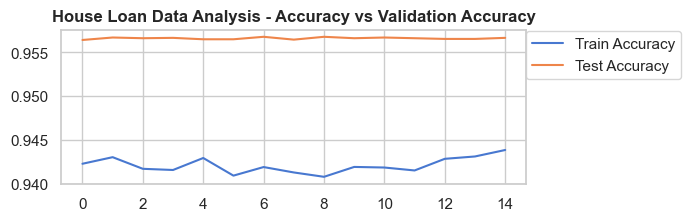

In [113]:
##############################################################################################################
# create the accuracy plot of training verses testing
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('House Loan Data Analysis - Accuracy vs Validation Accuracy',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5))
plt.grid(True)
plt.show()

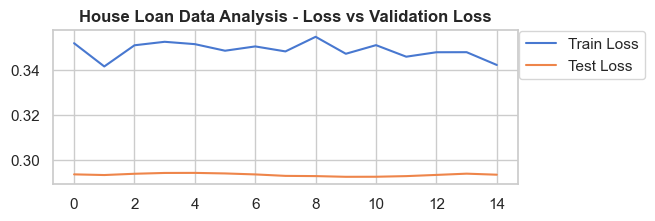

In [114]:
##############################################################################################################
#  plot the training verse testing loss
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('House Loan Data Analysis - Loss vs Validation Loss',fontweight='bold')
plt.legend(bbox_to_anchor=(0.79, .54, 0.5, 0.5))
plt.grid(True)
plt.show()

In [115]:
##############################################################################################################
# predict on test data after the model training
##############################################################################################################
pred=model.predict(xtest)

In [116]:
##############################################################################################################
# extract into classes the predicted data
##############################################################################################################
a=pred[pred>=.5]
len(a)

12677

In [117]:
##############################################################################################################
# extract the ground truth data for reporting and other purpose
##############################################################################################################
b=ytest[ytest==1]
len(b)

12413

In [118]:
##############################################################################################################
# extract the prdicted probability data into binary classes
##############################################################################################################
preda = pred[:,0]
pred1 = pd.DataFrame([preda]).T
pred1=pred1.rename(columns={0:'A'})
pred1['A']= pred1['A'].apply(lambda x:1 if x>.5 else 0)
c=pred1[pred1['A']==1]
len(c)

12677

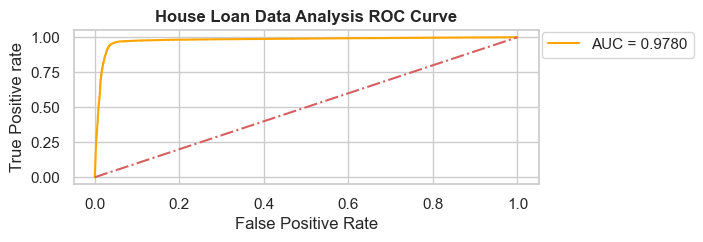

In [119]:
##############################################################################################################
# creata the roc - auc curve
##############################################################################################################
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresh = roc_curve(ytest, pred, pos_label=1)
roc_auc = auc(fpr, tpr)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(fpr, tpr, color='orange', label='AUC = %0.4f'% roc_auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('House Loan Data Analysis ROC Curve',fontweight='bold')
plt.legend(bbox_to_anchor=(0.85, .54, 0.5, 0.5))
plt.show()

In [121]:
printmd('Inspite of balancing and imputing several thousands of missing data rows, \
        the accuracy is great as we can see through the Roc curve')

## <span style="color:#cc1111">Inspite of balancing and imputing several thousands of missing data rows,         the accuracy is great as we can see through the Roc curve</span>

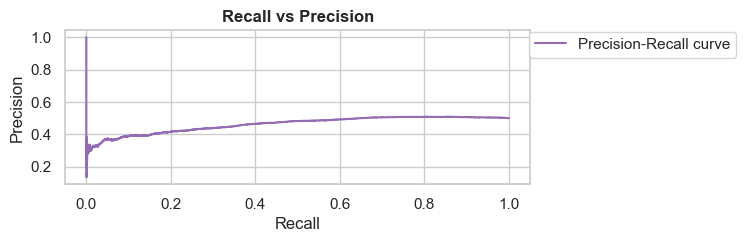

In [122]:
##############################################################################################################
# creata the precision recall curve 
##############################################################################################################
mse = np.mean(np.power(xtest - pred, 2), axis=1)
precision, recall, th = precision_recall_curve(ytest, mse)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(recall, precision, 'm', label='Precision-Recall curve')
plt.title('Recall vs Precision',fontweight='bold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(0.96, .54, 0.5, 0.5))
plt.show()

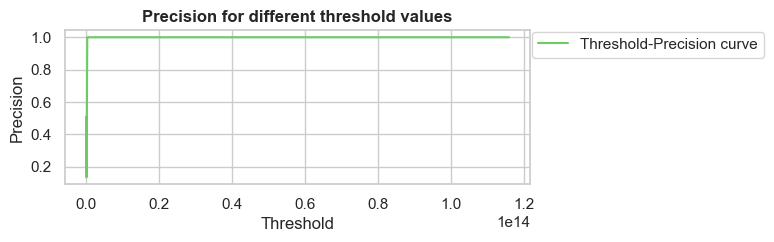

In [123]:
##############################################################################################################
# creata the Threshold Precision curve 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(th, precision[1:], 'g', label='Threshold-Precision curve')
plt.title('Precision for different threshold values',fontweight='bold')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.02, .54, 0.5, 0.5))
plt.show()

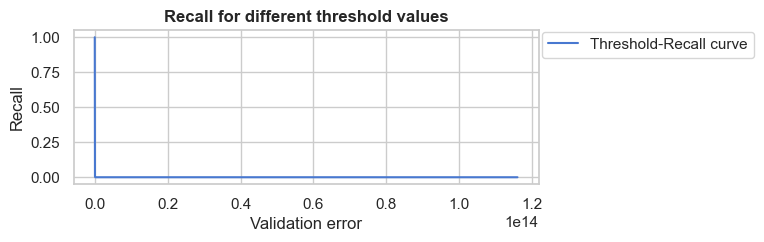

In [124]:
##############################################################################################################
# creata the Threshold Recall curve 
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values',fontweight='bold')
plt.xlabel('Validation error')
plt.ylabel('Recall')
plt.legend(bbox_to_anchor=(0.98, .54, 0.5, 0.5))
plt.show()

Confusion matrix of Home Loan Data
[[11743   670]
 [  406 12007]]


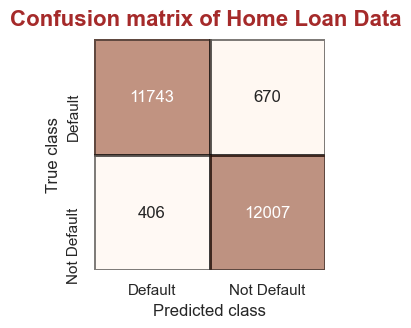

In [125]:
##############################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from sklearn.metrics import confusion_matrix, classification_report
LABELS=['Default','Not Default']
conf_matrix = confusion_matrix(ytest, pred1)
print('Confusion matrix of Home Loan Data' )
print(conf_matrix)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,
            annot=True,robust=True, alpha=.5,fmt="d",cmap=plt.cm.Oranges)
plt.suptitle("Confusion matrix of Home Loan Data",color='brown',fontweight='bold',fontsize=16)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [126]:
##############################################################################################################
# create the classification report for precision recall/sensitivity f-1 score and other details.
##############################################################################################################
print(classification_report(ytest, pred1,target_names=['Not Default','Default']))

              precision    recall  f1-score   support

 Not Default       0.97      0.95      0.96     12413
     Default       0.95      0.97      0.96     12413

    accuracy                           0.96     24826
   macro avg       0.96      0.96      0.96     24826
weighted avg       0.96      0.96      0.96     24826



In [127]:
printmd(' Precision is high for Not default class and Recall/Sensitivity is high for default class, \
            F-1 score is same for both classes.')
printmd(' Sensitivity for Default prediction is 97%. So, we can use the model without any problem to predict \
            whether or not an applicant will repay the loan based on the historical data.')
printmd(' Overall accuracy of the model is 96% which is not great but ok for an \
          imbalanced dataset with 65 features having hugh number of missing values')

## <span style="color:#cc1111"> Precision is high for Not default class and Recall/Sensitivity is high for default class,             F-1 score is same for both classes.</span>

## <span style="color:#cc1111"> Sensitivity for Default prediction is 97%. So, we can use the model without any problem to predict             whether or not an applicant will repay the loan based on the historical data.</span>

## <span style="color:#cc1111"> Overall accuracy of the model is 96% which is not great but ok for an           imbalanced dataset with 65 features having hugh number of missing values</span>

In [129]:
printmd('Let me check the accuracy on training data')

## <span style="color:#cc1111">Let me check the accuracy on training data</span>

In [130]:
##############################################################################################################
# predict on test data after the model training
##############################################################################################################
pred=model.predict(xtrain)

In [131]:
##############################################################################################################
# extract the prdicted probability data into binary classes
##############################################################################################################
preda = pred[:,0]
pred1 = pd.DataFrame([preda]).T
pred1=pred1.rename(columns={0:'A'})
pred1['A']= pred1['A'].apply(lambda x:1 if x>.5 else 0)
c=pred1[pred1['A']==1]
len(c)

38176

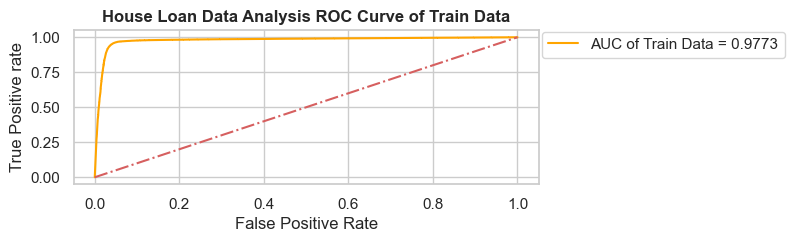

In [132]:
##############################################################################################################
# creata the roc - auc curve
##############################################################################################################

fpr, tpr, thresh = roc_curve(ytrain, pred, pos_label=1)
roc_auc = auc(fpr, tpr)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(fpr, tpr, color='orange', label='AUC of Train Data = %0.4f'% roc_auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('House Loan Data Analysis ROC Curve of Train Data',fontweight='bold')
plt.legend(bbox_to_anchor=(0.99, .54, 0.5, 0.5))
plt.show()

Confusion matrix of Home Loan Train Data 
[[35125  2115]
 [ 1176 36061]]


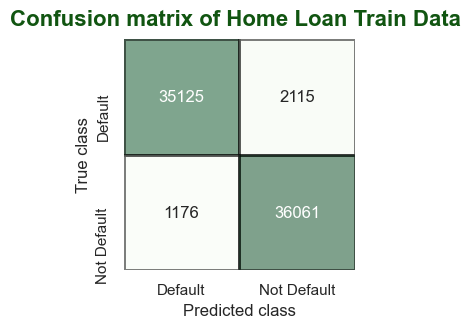

In [133]:
##############################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
conf_matrix = confusion_matrix(ytrain, pred1)
print('Confusion matrix of Home Loan Train Data ' )
print(conf_matrix)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,
            annot=True,robust=True, alpha=.5,fmt="d",cmap=plt.cm.Greens)
plt.suptitle("Confusion matrix of Home Loan Train Data",color='#115511',fontweight='bold',fontsize=16)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [134]:
##############################################################################################################
# create the classification report for precision recall/sensitivity f-1 score and other details.
##############################################################################################################
print(classification_report(ytrain, pred1,target_names=['Not Default','Default']))

              precision    recall  f1-score   support

 Not Default       0.97      0.94      0.96     37240
     Default       0.94      0.97      0.96     37237

    accuracy                           0.96     74477
   macro avg       0.96      0.96      0.96     74477
weighted avg       0.96      0.96      0.96     74477



In [137]:
printmd('Accuracy on training data is about the same as that of test data; with 300% more volume')

## <span style="color:#cc1111">Accuracy on training data is about the same as that of test data; with 300% more volume</span>